## Project Analyze A/B Test Results
#### by Samuel Jiménez Sanabria

### Resources ###
- [An Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/)
- [Two-sample Proportion Hypothesis Testing with Statsmodels](http://knowledgetack.com/python/statsmodels/proportions_ztest/)
- [statsmodels.stats.proportion.proportions_ztest](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html)
- [Machine Learning with Python](https://www.udemy.com/machinelearningpython/)
- [Differences between ONE-TAILED and TWO-TAILED tests](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/)
- [One-tailed and two-tailed tests](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/one-tailed-and-two-tailed-tests)
- [Scikit-learn RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
- [Scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Pyplot axvline](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axvline)


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)

### Apendix
- [Part IV - with SCKI-LEARN](#scikit-learn)
- [Last words](#last-words)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


***Note:*** 'converted' means users that decide to buy the product so 1 = one purchase

b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Calculate the length of the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Number of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# Proportion of users converted (regardless page)
df['converted'].mean()*100

11.965919355605511

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Treatment user lands incorrectly on old page
lineup_miss1= df.query("group == 'treatment' and landing_page == 'old_page'")
len(lineup_miss1)
# Tontrol user lands incorrectly on new page
lineup_miss2 = df.query("group == 'control' and landing_page == 'new_page'")
len(lineup_miss2)

# Total missed lineups 
missed_lineups = len(lineup_miss1) + len(lineup_miss2)
print("The number of times the new_page and treatment don't line up is {}".format(missed_lineups))

The number of times the new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [7]:
# Sum null values if any
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Quiz 2 lead us to drop these rows
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [9]:
# Save to new dataset
df.to_csv('ab_edit1.csv', index=False)

In [10]:
# Read the new dataset
df2 = pd.read_csv('ab_edit1.csv')

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# Count unique users
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# Find how any users are repeated
sum(df2['user_id'].duplicated())

1

In [14]:
# Who is the repeated user?
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
# Display data for the repeated user_id
df2.query("user_id == 773192")

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Drop a row
df2.drop(labels=1876, axis=0, inplace=True)

In [17]:
# We compare the number of rows with the number of unique users
df2.shape[0], df2['user_id'].nunique()

(290584, 290584)

In [18]:
# Confirm no duplicates
sum(df2['user_id'].duplicated())

0

In [19]:
# Confirm user instances
df2.query("user_id == 773192")

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#### Up to this point: 
- All rows in the dataset represent Unique Users.
- New pages are displayed only to the Treatment Group.
- Old opages are displayed only the the Control Group.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
# Probability of an individual converting regardless of the page
prob = df2['converted'].mean()
print("The probability is {}".format(prob))

The probability is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
# Control group, what is the probability they converted?
prob_contr = df2.query("group == 'control'").converted.mean()
print("The probability is {}".format(prob_contr))

The probability is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# Treatment group, what is the probability they converted?
prob_treat = df2.query("group == 'treatment'").converted.mean()
print("The probability is {}".format(prob_treat))

The probability is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [23]:
# The length of the dataset (or individuals)
individuals = len(df2)
# The probability is the number of times we observe a new landing_page divided by the number of individuals
prob_new_page = df.query("landing_page == 'new_page'").landing_page.count() / individuals
print("The probability is {}".format(prob_new_page))

The probability is 0.5000653855683727


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Response**

Given the data and metrics performed so far there is no strong evidence that a new page would lead to more conversions. 
The pobability for a landing page beign old or new is 50% so both pages are given the same options to be displayed for an user. 
The total probability of converting is already very low, 0.1196. But minimal difference in probabilities based on group (0.1204 vs. 0.1188) gives a stronger sense that there is no gain in adopting the new page. The conversion rate for the new page is actually a little lower than the rate for the old one.

### The duration of the test

In [24]:
#df2.head(1)
#df.tail(1)

In [25]:
time_df = df2.sort_values(['timestamp'], ascending=True)
time_rows = pd.concat([time_df.iloc[0,:], time_df.iloc[-1,:]])
time = pd.DataFrame(time_rows['timestamp'])
time 

,0
timestamp,2017-01-02 13:42:05.378582
timestamp,2017-01-24 13:41:54.460509


As we can see from the resut, the tests were performed during a period of **22 days**.


----------------------

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis**: The old page will have a higher or equal conversion rate. The difference in conversion rate is less or equal to 0

$H_0:  p_{new} - p_{old} \leq 0$ 

**Alternative hypothesis**: The new page will have a higher conversion rate. The difference in conversion rate is higher than 0

$H_1: p_{new} - p_{old} > 0$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
# Probability of converting if the new page is shown
p_new = df2.query("landing_page == 'new_page'").converted.mean()
p_new

0.11880806551510564

In [27]:
# Convert Rate for p_new under the null: The same as the converted succcess rate regardless of page
p_new_null = df2.converted.mean()
p_new_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
# Probability of converting if the old page is shown
p_old = df2.query("landing_page == 'old_page'").converted.mean()
p_old

0.1203863045004612

In [29]:
# Convert Rate for p_old under the null: The same as the converted succcess rate regardless of page
p_old_null = df2.converted.mean()
p_old_null

0.11959708724499628

In [30]:
# Compute and store the real observed difference
obs_diff = p_new - p_old
obs_diff

-0.0015782389853555567

c. What is $n_{new}$?

In [31]:
# Times in the dataset the new page is shown
n_new = df2.query("landing_page == 'new_page'").landing_page.count()
n_new

145310

d. What is $n_{old}$?

In [32]:
# Times in the dataset the old page is shown
n_old = df2.query("landing_page == 'old_page'").landing_page.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
# Probability simulation for n_new 
# Using np.random.choice (with bootstraping)
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new_null, (1-p_new_null)])
new_page_converted.mean()

0.11940678549308376

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [34]:
# Probability simulation for n_old
# Using np.random.choice (with bootstraping)
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old_null, (1-p_old_null)])
old_page_converted.mean()

0.11993199058331154

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [35]:
# Difference in probability for simulated values
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.00052520509022778439

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [36]:
# Simulation of 10.000 new values 
# Using np.random.choice (with bootstraping)
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new_null, (1-p_new_null)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old_null, (1-p_old_null)])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

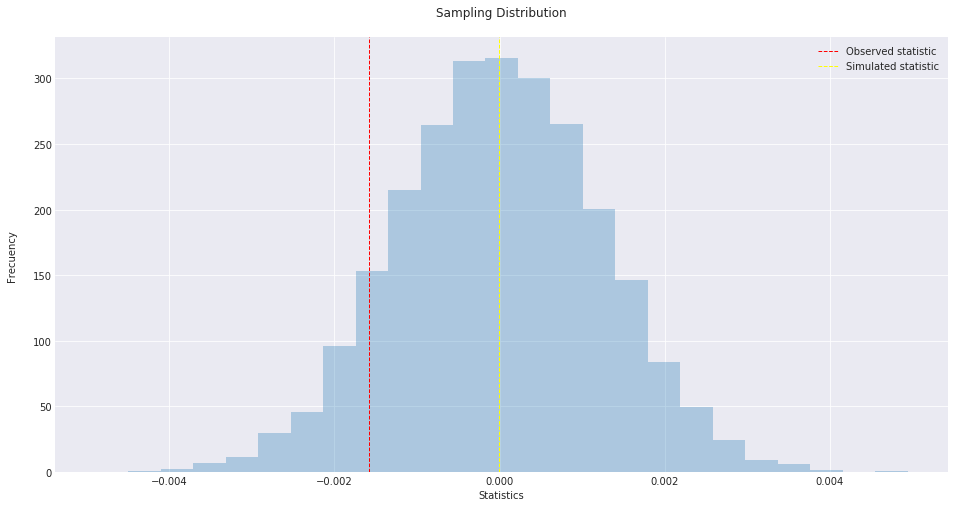

In [37]:
# Plot histogram
plt.figure(1, figsize=(16,8))
# plt.hist(p_diffs);
n, bins, patches = plt.hist(p_diffs, 25, density=1, alpha=0.30)
# Plot line for observed statistic
plt.axvline(obs_diff, c='r', linewidth=1, linestyle='--', label='Observed statistic');
# Plot line for simulated statistic
plt.axvline(np.array(p_diffs).mean(), c='yellow', linewidth=1, linestyle='--', label='Simulated statistic');

plt.title("Sampling Distribution\n")
plt.xlabel("Statistics\n\n")
plt.ylabel("Frecuency\n")
plt.legend()
plt.show()

**The histogram is shows a normal distribution of statistics following the Normal Limit Theorem as expected.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
# Actual difference
actual_diff = p_new - p_old
actual_diff

-0.0015782389853555567

In [39]:
# Proportion of p_diffs greater than the actual diff
proportion = (p_diffs > actual_diff).mean()*100
proportion

90.060000000000002

In [40]:
# P-Value
p_value = proportion/100
print("The P-Value is {}".format(p_value))

The P-Value is 0.9006000000000001


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
We just calculated **the p-value**. 
As we can see, the p-value is much higher than the 5% of tolerance estipulated (alpha=0.05). The p-value means that the probability of obtaining the observed statistic in the simulated sample is not low enough so we can reject the Null Hypothesis.

In other words, the new page will not lead to better conversion rates. In fact, looking at the conversion rates and differences in probability, the old page seems to give slightly better conversion rates.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2.query("converted == 1 and landing_page == 'old_page'").converted.count()
convert_new = df2.query("converted == 1 and landing_page == 'new_page'").converted.count()

n_old = df2.query("group == 'control'").user_id.count()
n_new = df2.query("group == 'treatment'").user_id.count()

print("Number of conversions old_page: {}".format(convert_old)) 
print("Number of conversions new_page: {}".format(convert_new)) 
print("Invididuals received old_page: {}".format(n_old)) 
print("Invididuals received new_page: {}".format(n_new)) 

Number of conversions old_page: 17489
Number of conversions new_page: 17264
Invididuals received old_page: 145274
Invididuals received new_page: 145310


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
# Computing test statistic and p-value
# Using the parameter 'larger'. 'two-side' pamameter gives a p-v of 0.19
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], 
                                              [n_new, n_old], 
                                              alternative=('larger'))
print("The z-score is: {}".format(z_score))
print("The p_value is: {}".format(p_value))

The z-score is: -1.3109241984234394
The p_value is: 0.9050583127590245


In [43]:
# Calculating the critical value for decission on rejecting the Null
from scipy.stats import norm

norm_ppf = norm.ppf(1-(0.05)) # One tail test
print("Critical value at 95% confidence: {}".format(norm_ppf)) 

Critical value at 95% confidence: 1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** The z-score is measuring the numner of standard deviations from the mean. Since the **z-score** is lower than the **critical value** we do not reject the Null Hipothesis.
The differences in the p-values from this method to the one used in j. and k. are very subtle and confirm that there is no statistical evidence that the new page would lead to better conversion rates.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** A Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
df2['intercept'] = 1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels = ['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
import statsmodels.api as sm

log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]) # Model instance
results = log_model.fit() # Model fit

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        15:49:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br> 

**Regression Null and Alternative hypothesis**
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} != 0$$

**Answer:** The new p-values is 0.190. The reason for the P-value beign different is because in part one we are doing a one-site test, where we are testing the statistical significance in the one direction of interest (if the revenue is higher with the new page). The Logistic Regression performs a two-side test. When using a two-tailed test, regardless of the direction of the relationship you hypothesize, you are testing for the possibility of the relationship in both directions. We can confirm the numbers looking at the previous exercise **m** and changing the parameter alternative='larger' to alternative='two-sides' and observing the change in p-value.

*Source: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** I think there are other factors that could influence the conversion rate. For example, without knowing what type of page we are looking at, timestamp, country, region, big city/rural, gender, age... All are features that could help to know why or when a conversion takes place. Adding new features and measuring the results can improve the model considerably. But it's a question of trying-tuning so we don't use data that doesn't improve results. At the same time **multicollinearity** can be a problem when adding extra patrameters because the correlation that could exist between them.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [47]:
# Load dataset
df3 = pd.read_csv('countries.csv')
df3.head(1)

,user_id,country
0,834778,UK


In [48]:
# Merge df2 and the new df3 datasets joined on user_id
df_merged = pd.merge(left = df2, right = df3,
                     left_on='user_id', right_on = 'user_id')

df_merged.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US


In [49]:
# Just checking the new dataset 
df_merged['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [50]:
df_merged.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
intercept       0
ab_page         0
country         0
dtype: int64

In [51]:
len(df_merged['user_id'])

290584

In [52]:
len(df_merged['country'])

290584

In [53]:
# Add country columns
df_merged[['US','UK','CA']]=pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [54]:
# Fit new model
log_model2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'US', 'UK']]) 
result2 = log_model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        15:49:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
# Fit a new model including ab_page
log_model3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK']]) 
result3 = log_model3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        15:49:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

Our first observation and recommendation should be based on the fact that the test were performed under a period of only 22 days. This, in my opinion, a period of time too short to be able to see the effects of such a change. So my first recomendation would be to run the test for a longer period of time if possible. And during a period of time were no big consumer "events" take place, like Chritmas time etc... where the convoersion rate could be naturally higher than normal.
But looking at the data recorded the observed results suggest that there is no advantage in using the new page. At least there is no statistical evicence of increase in conversion rate. Meaning, the company will not increase revenue because of the new page. Our recommendation is in this case to keep the old page.

Technically, we support this recomandation by looking att diffferent aspects like the p-values. The p-values aren't low enough to reject the Null hypothesis. Also, looking at the coeficients we can deduce that the new page even slightly decreases the conversion rates.

This observation is consistent in every case studied and doesn't change when using a regression approach or adding additional features.


<a id='scikit-learn'></a>
# Appendix
## with SCIKIT-LEARN
In this last section I've computed some mertrics to experiment using scikit-learn

In [56]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [57]:
# Save the dataset from the previous models to file
df_merged.to_csv('ab_edit2.csv', index=False)

In [58]:
# Read new dataset
df_new = pd.read_csv('ab_edit2.csv')
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [59]:
# Define x, y variables for the rfe fit
df_vars = df_new.columns.values.tolist()
df_vars = np.asarray(df_vars)
Y = ['converted']
X = ['ab_page', 'US', 'UK', 'CA']
df_vars

array(['user_id', 'timestamp', 'group', 'landing_page', 'converted',
       'intercept', 'ab_page', 'country', 'US', 'UK', 'CA'], 
      dtype='<U12')

In [60]:
# Feature ranking with recursive feature elimination.
n = 2
lr = LogisticRegression()
rfe = RFE(lr, n)
rfe = rfe.fit(df_new[X], df_new[Y].values.ravel())

In [61]:
print(rfe.support_) # Features to be chosen by scikit-learn (n=2)
print(rfe.ranking_) # Feature ranking 

[False  True False  True]
[3 1 2 1]


In [62]:
# Define features
features = ['ab_page', 'US', 'UK', 'CA']

In [63]:
# Define variables y predictor
X = df_new[features]
Y = df_new['converted']

In [64]:
# Model Fit
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
# Model score
logit_model.score(X,Y)

0.88040291275500371

In [66]:
# Proportion of users who convert: the same as in Part 1 d.
Y.mean()*100

11.959708724499627

In [67]:
# Print coeficients: Indicates the change in probability of conversion
# We already observed these values using statsmodels.
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))


,0,1
0,ab_page,[-0.0149756216143]
1,US,[-0.530080465946]
2,UK,[-0.479774064987]
3,CA,[-0.489691461157]


## Validation

In [68]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
# Split dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [70]:
# Fit model
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
# Probabilities of 0 (no conversion) vs 1 (conversion) 
probs = lm.predict_proba(X_test)
probs_df = pd.DataFrame(probs)
probs_df.head()

,0,1
0,0.881976,0.118024
1,0.878551,0.121449
2,0.881976,0.118024
3,0.878551,0.121449
4,0.881976,0.118024


In [72]:
# Based on the probabilities scikit-learn splits the decission 0 or 1 at 0.5 (threshold) and we could change
# it to our probability of conversion about 12% but we leave it as is for demostration
prediction = lm.predict(X_test)
prediction 

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
# The accuracy score
metrics.accuracy_score(Y_test, prediction)

0.87888868495916306

In [74]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)
scores

array([ 0.88038541,  0.88038129,  0.88038129,  0.88041159,  0.88041159,
        0.88041159,  0.88041159,  0.88041159,  0.88041159,  0.88041159])

In [75]:
scores.mean()

0.88040291302427742

<a id='last-words'></a>
## Last words

> To finish I'd like to add that this project in particular has meant a lot in my journey towards learning Data Analysis. I've gone through the videos, quizes and notebooks several times trying to really grasp every concept discussed and towards the end I started to feel really confident in explaining with my own words what is happening at every estage.
Even if i find some of the video-lessons explanations a bit superficial and the videos of the first section on probability hard to digest, I highly value this section on Practicat Statistics. It's very good learning material and the projects really pushed me forward.

Samuel Jiménez Sanabria

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0